# **Andes Bank: Sistema de Alerta Temprana de Abandono**

## **Contexto del Negocio:**

AndesBank Retail ha identificado un aumento progresivo en la salida de clientes.
Dado que adquirir nuevos clientes es significativamente más costoso que retener los existentes, el banco busca comprender qué factores influyen en la decisión de abandono y qué perfiles presentan mayor riesgo de churn.

## **Objetivo del Proyecto:**

* Analizar el comportamiento y características de los clientes
* Identificar los principales drivers de churn
* Definir perfiles de clientes en riesgo
* Sentar las bases para un sistema de alerta temprana que permita acciones preventivas

## **1. Extracción:**

### **1.1 Importación de librerías:**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### **1.2 Carga del dataset:**

In [66]:
url = 'https://raw.githubusercontent.com/DevEnriquegd/early_churn_warning_system/refs/heads/main/customer-churn-records.csv'

df = pd.read_csv(url)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### **1.3 Comprensión inicial del dataset:**

In [68]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1507,1508,15577274,Genovese,549,Germany,Female,43,3,134985.66,1,1,0,6101.41,0,0,3,PLATINUM,903
2839,2840,15585451,Vigano,558,Germany,Female,32,1,108262.87,1,1,1,6935.31,0,0,3,PLATINUM,259
6793,6794,15611669,Nyhan,623,Germany,Male,50,7,126608.37,1,0,1,645.61,1,1,2,GOLD,676
2387,2388,15595588,Chukwunonso,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0,0,2,GOLD,545
982,983,15792360,Clark,668,France,Male,32,7,0.00,2,1,1,777.37,0,0,2,GOLD,883


### **1.4 Revisión de calidad de datos**

In [69]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## **2. Transformación:**

### **2.1 Eliminación de variables sin valor analítico:**

In [70]:
columnas_sin_valor = ['RowNumber', 'CustomerId', 'Surname']

df.drop(columns=columnas_sin_valor, inplace=True)

df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7476,759,France,Male,44,2,111095.58,2,1,0,100137.70,0,0,4,DIAMOND,784
3744,647,Germany,Male,37,3,116509.99,1,1,1,149517.71,1,1,1,GOLD,529
2700,564,France,Male,31,4,0.00,2,1,0,53520.03,0,0,4,PLATINUM,363
2923,705,Germany,Male,41,4,72252.64,2,1,1,142514.66,0,0,2,GOLD,710
2587,563,France,Male,33,8,0.00,2,0,1,68815.05,0,0,5,PLATINUM,983


### **2.2 Estandarizando los nombres de las columnas:**

In [71]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]

df.sample(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,complain,satisfaction _score,card _type,point _earned
5981,634,Germany,Female,37,7,143258.85,2,1,0,192721.98,0,0,2,DIAMOND,760
4699,844,Spain,Male,56,5,99529.70,1,0,1,157230.06,1,1,1,PLATINUM,293
9776,747,France,Male,29,7,0.00,2,1,1,141706.43,0,0,1,DIAMOND,338
9948,724,Germany,Female,53,1,139687.66,2,1,1,12913.92,0,0,2,DIAMOND,371
6117,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0,0,2,DIAMOND,272


In [72]:
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,complain,satisfaction _score,point _earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### **2.4 Creación de variables derivadas**

In [73]:
# 1️⃣ Rangos de edad
bins = [18, 30, 45, 60, 100]
labels = ['Young Adult', 'Established Adult', 'Senior', 'Older Adult']

df['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [74]:
# 2️⃣ Segmentos de balance
balance_quantiles = df['balance'].quantile([0.33, 0.66]).values

bins_balance = [-1, balance_quantiles[0], balance_quantiles[1], df['balance'].max()]
labels_balance = ['Low Balance', 'Medium Balance', 'High Balance']

df['balance_segment'] = pd.cut(
    df['balance'],
    bins=bins_balance,
    labels=labels_balance
)

In [75]:
# 3️⃣ Clasificación de tenure
bins_tenure = [-1, 2, 5, 10]
labels_tenure = ['New Customer', 'Developing Customer', 'Loyal Customer']

df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=bins_tenure,
    labels=labels_tenure
)

In [76]:
# 4️⃣ Indicadores de engagement
bins=[0, 1, 2, max]
labels=['Single Product', 'Multi Product', 'Highly Engaged']

df['product_segment'] = pd.cut(
    df['num_of_products'],
    bins=[0, 1, 2, df['num_of_products'].max()],
    labels=['Single Product', 'Multi Product', 'Highly Engaged']
)

In [77]:
# 5️⃣ Puntos acumulados
points_quantiles = df['point _earned'].quantile([0.33, 0.66]).values

df['points_segment'] = pd.cut(
    df['point _earned'],
    bins=[-1, points_quantiles[0], points_quantiles[1], df['point _earned'].max()],
    labels=['Low Points', 'Medium Points', 'High Points']
)

In [78]:
# 6️⃣ Segmentación de salario estimado
salary_quantiles = df['estimated_salary'].quantile([0.33, 0.66]).values

df['salary_segment'] = pd.cut(
    df['estimated_salary'],
    bins=[-1, salary_quantiles[0], salary_quantiles[1], df['estimated_salary'].max()],
    labels=['Low Salary', 'Medium Salary', 'High Salary']
)

In [79]:
# 7️⃣ Segmentación de score crediticio
score_quantiles = df['credit_score'].quantile([0.33, 0.66]).values

df['credit_score_segment'] = pd.cut(
    df['credit_score'],
    bins=[-1, score_quantiles[0], score_quantiles[1], df['credit_score'].max()],
    labels=['Low Score', 'Medium Score', 'High Score']
)

In [80]:
df.sample(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,...,satisfaction _score,card _type,point _earned,age_group,balance_segment,tenure_group,product_segment,points_segment,salary_segment,credit_score_segment
9859,678,Germany,Male,55,4,129646.91,1,1,1,184125.10,...,5,SILVER,482,Senior,High Balance,Developing Customer,Single Product,Medium Points,High Salary,Medium Score
1786,711,Spain,Male,37,2,0.00,2,1,0,83978.86,...,4,GOLD,407,Established Adult,Low Balance,New Customer,Multi Product,Low Points,Medium Salary,High Score
7609,681,France,Male,46,0,105969.42,1,1,0,5771.56,...,4,GOLD,386,Senior,Medium Balance,New Customer,Single Product,Low Points,Low Salary,Medium Score
2291,598,Spain,Male,27,8,90721.52,2,1,0,109296.18,...,1,GOLD,698,Young Adult,Medium Balance,Loyal Customer,Multi Product,Medium Points,Medium Salary,Low Score
8318,520,France,Female,39,6,145644.05,1,0,0,104118.93,...,3,PLATINUM,467,Established Adult,High Balance,Loyal Customer,Single Product,Low Points,Medium Salary,Low Score


### **2.5 Dataset final para análisis:**

In [81]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)

In [82]:
df.columns = df.columns.str.replace('__', '_')

In [139]:
df.columns.tolist()

['geography',
 'gender',
 'age',
 'age_group',
 'tenure',
 'tenure_group',
 'num_of_products',
 'product_segment',
 'credit_score',
 'credit_score_segment',
 'balance',
 'balance_segment',
 'estimated_salary',
 'salary_segment',
 'has_cr_card',
 'is_active_member',
 'card_type',
 'point_earned',
 'points_segment',
 'complain',
 'satisfaction_score',
 'exited',
 'exited_pct',
 'complain_label']

In [84]:
ordered_columns = [
    # 1️⃣ Customer profile
    'geography',
    'gender',
    'age',
    'age_group',

    # 2️⃣ Relationship with the bank
    'tenure',
    'tenure_group',
    'num_of_products',
    'product_segment',

    # 3️⃣ Financial behavior
    'credit_score',
    'credit_score_segment',
    'balance',
    'balance_segment',
    'estimated_salary',
    'salary_segment',

    # 4️⃣ Engagement & experience
    'has_cr_card',
    'is_active_member',
    'card_type',
    'point_earned',
    'points_segment',
    'complain',
    'satisfaction_score',

    # 5️⃣ Target variable
    'exited'
]

df = df[ordered_columns]
df.sample(5)

,geography,gender,age,age_group,tenure,tenure_group,num_of_products,product_segment,credit_score,credit_score_segment,...,estimated_salary,salary_segment,has_cr_card,is_active_member,card_type,point_earned,points_segment,complain,satisfaction_score,exited
2436,Spain,Male,37,Established Adult,4,Developing Customer,2,Multi Product,704,High Score,...,25684.93,Low Salary,0,0,SILVER,439,Low Points,0,5,0
3466,France,Male,28,Young Adult,4,Developing Customer,1,Single Product,791,High Score,...,174435.48,High Salary,1,0,PLATINUM,397,Low Points,0,2,0
8410,France,Female,46,Senior,9,Loyal Customer,1,Single Product,743,High Score,...,113436.08,Medium Salary,1,0,DIAMOND,761,High Points,0,2,0
5492,France,Male,35,Established Adult,7,Loyal Customer,1,Single Product,712,High Score,...,69320.97,Medium Salary,1,1,PLATINUM,744,High Points,0,3,0
1215,Spain,Female,54,Senior,8,Loyal Customer,1,Single Product,745,High Score,...,173912.29,High Salary,1,0,GOLD,447,Low Points,1,1,1


In [85]:
df.to_csv('andesbank_churn_eda_ready.csv', index=False)

## **3. Análsis:**

#### Paleta del proyecto

|Azul Institucional|||
|------|------|------|
| PRIMARY_BLUE |SECONDARY_BLUE |ACCENT_BLUE |
|#0A2540 | #163A5F | #2F5D8A |

&nbsp;

|Verde Confianza|||
|------|------|------|
| TRUST_GREEN |SUCCESS_GREEN | — |
|#1F7A63 | #2E8B57 | — |

&nbsp;

|Grises Corporativos|||||
|------|------|------|------|------|
| WHITE |LIGHT_GRAY |MEDIUM_GRAY |DARK_GRAY |BLACK |
|#FFFFFF | #F3F4F6 | #C7CCD1 | #4B5563 | #111827 |

&nbsp;

In [86]:
PRIMARY_BLUE, SECONDARY_BLUE, ACCENT_BLUE = (
    "#0A2540", "#163A5F", "#2F5D8A"
)

TRUST_GREEN, SUCCESS_GREEN = "#1F7A63", "#2E8B57"

WHITE, LIGHT_GRAY, MEDIUM_GRAY, DARK_GRAY, BLACK = (
    "#FFFFFF", "#F3F4F6", "#C7CCD1", "#4B5563", "#111827"
)

### **¿Cuál es la magnitud real del churn en AndesBank y qué tan concentrado está?**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras que muestre la tasa de abandono en Andes Bank.

En "df", tenemos las siguientes columnas:
* exited: presenta valores son 1 "Exited Clients" y 0 "Active Clients"

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

In [87]:
def plot_churn_rate():
  data_churn = df['exited'].value_counts(normalize=True).reset_index()
  data_churn.columns = ['status', 'percentage']
  data_churn['percentage'] = data_churn['percentage'] * 100
  data_churn['status'] = data_churn['status'].map({
    1: 'Clientes que Abandonaron',
    0: 'Clientes Activos'
})

  # Configuración del lienzo (10, 6)
  sns.set_theme(style="white")
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.patch.set_facecolor(LIGHT_GRAY)
  ax.set_facecolor(LIGHT_GRAY)

  # Construcción del gráfico utilizando PRIMARY_BLUE para el énfasis
  sns.barplot(
      data=data_churn,
      x='status',
      y='percentage',
      hue='status',
      palette=[MEDIUM_GRAY, PRIMARY_BLUE],
      legend=False,
      ax=ax
  )

  # Refinamiento de Ejes y Tipografía
  ax.set_ylabel('')
  ax.set_yticks([])
  ax.set_xlabel('Estado del Cliente', fontsize=12, color=PRIMARY_BLUE, fontweight='bold')
  plt.xticks(fontsize=12, color=PRIMARY_BLUE)
  sns.despine(left=True, top=True, right=True)

  # Título de la figura
  plt.title(
      'Uno de cada cinco clientes abandona Andes Bank\nAndes Bank · 2026',
      fontsize=18,
      color=BLACK,
      fontweight='bold',
      pad=30,
      loc='center'
  )

  # Anotaciones de Datos (Porcentaje encima de cada columna)
  for p in ax.patches:
    val = p.get_height()
    ax.annotate(
        f'{val:.1f}%',
        (p.get_x() + p.get_width() / 2., val),
        ha='center', va='center',
        xytext=(0, 12),
        textcoords='offset points',
        fontsize=13,
        color=BLACK,
        fontweight='bold'
    )

  return plt

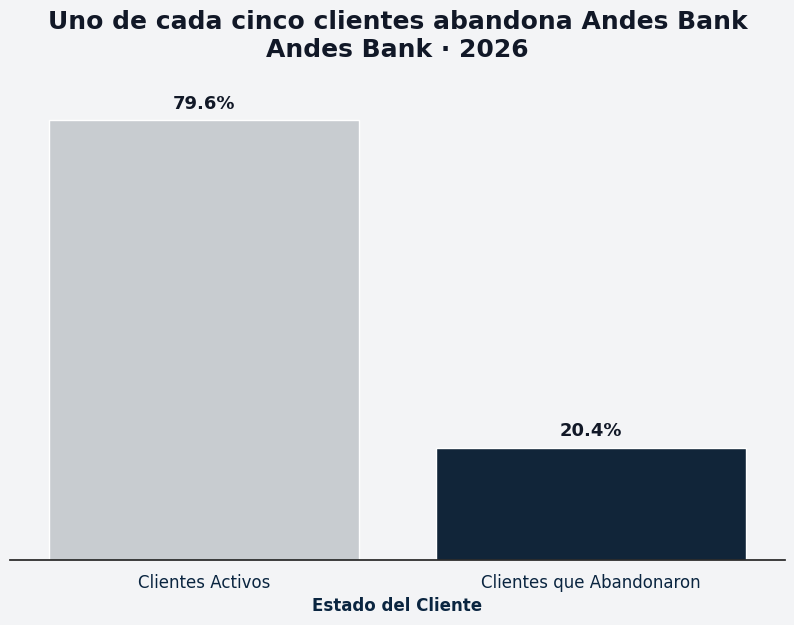

In [88]:
plot_churn_rate().show()

### **¿Qué perfiles demográficos presentan mayor probabilidad de abandonar el banco?**

In [102]:
def plot_churn_by_age_group():

    # 1. Preparación de datos
    df_plot = (
        df.groupby('age_group', observed=True)['exited']
        .mean()
        .reset_index()
    )
    df_plot['churn_pct'] = df_plot['exited'] * 100

    df_plot = df_plot.sort_values('age_group')

    # 2. Lienzo
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(LIGHT_GRAY)
    ax.set_facecolor(LIGHT_GRAY)

    # 3. Colores (highlight al grupo crítico)
    colores = {
        g: (PRIMARY_BLUE if g == 'Senior' else MEDIUM_GRAY)
        for g in df_plot['age_group']
    }

    # 4. Gráfico
    sns.barplot(
        data=df_plot,
        x='age_group',
        y='churn_pct',
        hue='age_group',
        palette=colores,
        legend=False,
        ax=ax
    )

    # 5. Estética
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('Segmentación por Ciclo de Vida', fontsize=12, fontweight='bold', color=PRIMARY_BLUE)
    ax.set_ylim(0, df_plot['churn_pct'].max() + 10)
    sns.despine(left=True, top=True, right=True)

    # 6. Título
    ax.set_title(
        'Los clientes Senior concentran la mayor tasa de abandono\nAndes Bank · 2026',
        fontsize=16, fontweight='bold', color=BLACK, pad=30
    )

    # 7. Anotaciones
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(
            f'{val:.1f}%',
            (p.get_x() + p.get_width() / 2, val),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=12, fontweight='bold', color=PRIMARY_BLUE
        )

    return plt

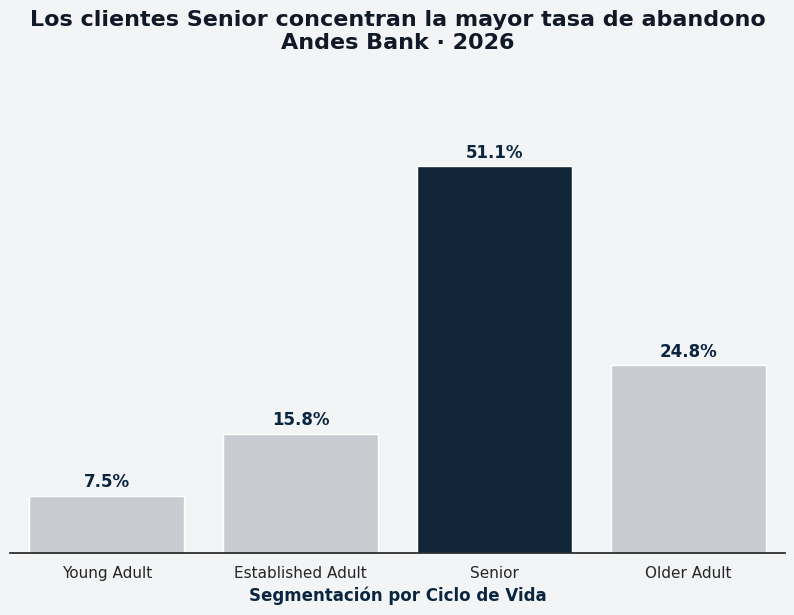

In [103]:
plot_churn_by_age_group().show()

In [91]:
def plot_churn_by_geography():

    # 1. Preparación y traducción
    df_plot = (
        df.groupby('geography', observed=True)['exited']
        .mean()
        .reset_index()
    )
    df_plot['churn_pct'] = df_plot['exited'] * 100
    df_plot['geography'] = df_plot['geography'].map({
        'Germany': 'Alemania',
        'Spain': 'España',
        'France': 'Francia'
    })
    df_plot = df_plot.sort_values('churn_pct', ascending=False)

    # 2. Lienzo
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(LIGHT_GRAY)
    ax.set_facecolor(LIGHT_GRAY)

    # 3. Colores (highlight país crítico)
    colores = {
        c: (PRIMARY_BLUE if c == 'Alemania' else MEDIUM_GRAY)
        for c in df_plot['geography']
    }

    # 4. Gráfico
    sns.barplot(
        data=df_plot,
        x='geography',
        y='churn_pct',
        hue='geography',
        palette=colores,
        legend=False,
        ax=ax
    )

    # 5. Estética
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('País', fontsize=12, fontweight='bold', color=PRIMARY_BLUE)
    ax.set_ylim(0, df_plot['churn_pct'].max() + 10)
    sns.despine(left=True, top=True, right=True)

    # 6. Título
    ax.set_title(
        'Alemania lidera el churn dentro de los mercados de Andes Bank\nAndes Bank · 2026',
        fontsize=16, fontweight='bold', color=BLACK, pad=30
    )

    # 7. Anotaciones
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(
            f'{val:.1f}%',
            (p.get_x() + p.get_width() / 2, val),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=12, fontweight='bold', color=PRIMARY_BLUE
        )

    return plt

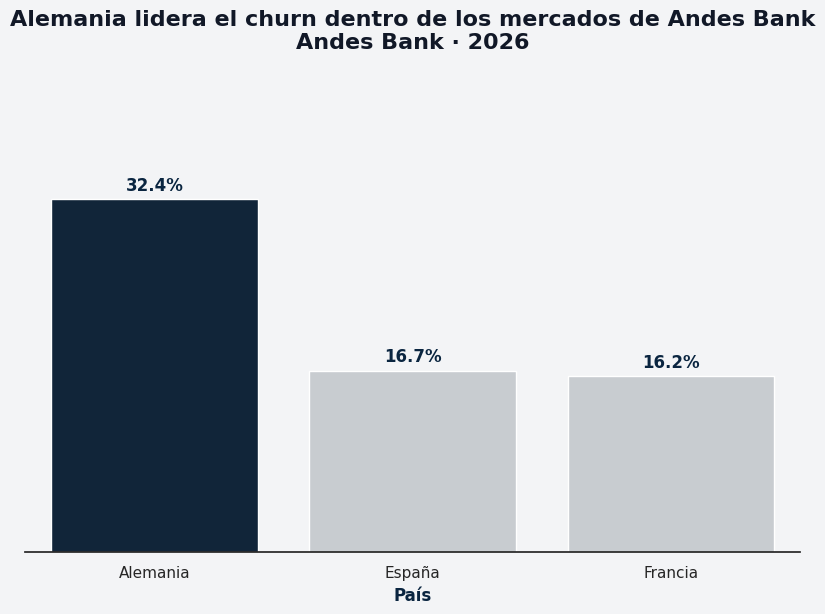

In [92]:
plot_churn_by_geography().show()

In [93]:
def plot_churn_by_gender():

    # 1. Preparación
    df_plot = (
        df.groupby('gender', observed=True)['exited']
        .mean()
        .reset_index()
    )
    df_plot['churn_pct'] = df_plot['exited'] * 100
    df_plot['gender'] = df_plot['gender'].map({
        'Female': 'Femenino',
        'Male': 'Masculino'
    })
    df_plot = df_plot.sort_values('churn_pct', ascending=False)

    # 2. Lienzo
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(LIGHT_GRAY)
    ax.set_facecolor(LIGHT_GRAY)

    # 3. Colores
    colores = {
        g: (PRIMARY_BLUE if g == 'Femenino' else MEDIUM_GRAY)
        for g in df_plot['gender']
    }

    # 4. Gráfico
    sns.barplot(
        data=df_plot,
        x='gender',
        y='churn_pct',
        hue='gender',
        palette=colores,
        legend=False,
        ax=ax
    )

    # 5. Estética
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('Género', fontsize=12, fontweight='bold', color=PRIMARY_BLUE)
    ax.set_ylim(0, df_plot['churn_pct'].max() + 10)
    sns.despine(left=True, top=True, right=True)

    # 6. Título
    ax.set_title(
        'El churn es consistentemente mayor en el segmento femenino\nAndes Bank · 2026',
        fontsize=16, fontweight='bold', color=BLACK, pad=30
    )

    # 7. Anotaciones
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(
            f'{val:.1f}%',
            (p.get_x() + p.get_width() / 2, val),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=12, fontweight='bold', color=PRIMARY_BLUE
        )

    return plt

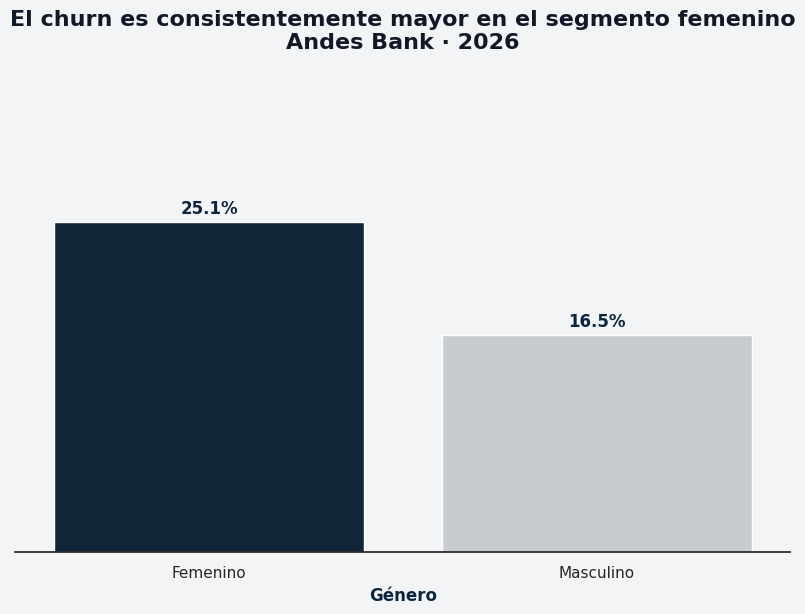

In [94]:
plot_churn_by_gender().show()

### **¿Cómo influyen las características financieras en la decisión de abandono?**

In [104]:
def plot_churn_by_number_of_products():
    # 1. Preparación de datos
    df_plot = (
        df.groupby('product_segment', observed=True)['exited']
          .mean()
          .reset_index()
    )
    df_plot['exited'] *= 100
    df_plot = df_plot.sort_values('exited', ascending=False)

    # 2. Configuración del lienzo
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(LIGHT_GRAY)
    ax.set_facecolor(LIGHT_GRAY)

    # 3. Colores: foco en el segmento con mayor churn
    top_segment = df_plot.iloc[0]['product_segment']
    colores = {
        val: (PRIMARY_BLUE if val == top_segment else MEDIUM_GRAY)
        for val in df_plot['product_segment']
    }

    sns.barplot(
        data=df_plot,
        x='product_segment',
        y='exited',
        hue='product_segment',
        palette=colores,
        legend=False,
        ax=ax
    )

    # 4. Estética
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel('Número de Productos', fontsize=12, color=PRIMARY_BLUE, fontweight='bold')
    ax.set_ylim(0, df_plot['exited'].max() + 15)
    sns.despine(left=True, top=True, right=True)

    # 5. Título (consultoría-style)
    ax.set_title(
        'El riesgo de churn aumenta significativamente en clientes con más productos\n'
        'Andes Bank · 2026',
        fontsize=16,
        color=BLACK,
        fontweight='bold',
        pad=30
    )

    # 6. Anotaciones
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(
            f'{val:.1f}%',
            (p.get_x() + p.get_width() / 2., val),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=12,
            color=PRIMARY_BLUE,
            fontweight='bold'
        )

    return plt

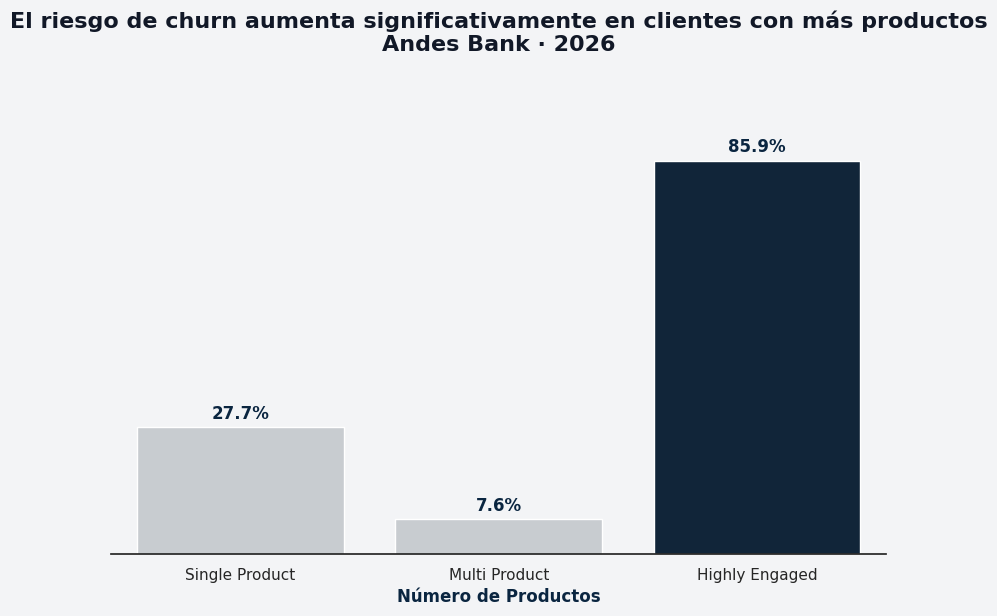

In [105]:
plot_churn_by_number_of_products().show()

In [114]:
def churn_table_by_balance():
    table = (
        df.groupby('balance_segment', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()
    )
    return table

churn_table_by_balance()

,balance_segment,churn_rate,total_clients
0,High Balance,24.5,3400
1,Medium Balance,23.6,2983
2,Low Balance,13.8,3617


In [113]:
def churn_table_by_credit_score():
    table = (
        df.groupby('credit_score_segment', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()
    )
    return table

churn_table_by_credit_score()

,credit_score_segment,churn_rate,total_clients
0,Low Score,21.5,3320
1,Medium Score,20.0,3307
2,High Score,19.7,3373


In [112]:
def churn_table_by_salary():
    table = (
        df.groupby('salary_segment', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()
    )
    return table

churn_table_by_salary()

,salary_segment,churn_rate,total_clients
0,High Salary,21.2,3400
1,Low Salary,20.1,3300
2,Medium Salary,19.8,3300


### **¿El nivel de relación y engagement con el banco reduce el churn?**

In [116]:
def churn_table_by_tenure():
    table = (
        df.groupby('tenure_group', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()
    )
    return table

churn_table_by_tenure()

,tenure_group,churn_rate,total_clients
0,New Customer,21.2,2496
1,Developing Customer,20.8,3010
2,Loyal Customer,19.7,4494


In [117]:
def churn_table_by_card_type():
    table = (
        df.groupby('card_type', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()

    )
    return table

churn_table_by_card_type()

,card_type,churn_rate,total_clients
0,DIAMOND,21.8,2507
1,PLATINUM,20.4,2495
2,SILVER,20.1,2496
3,GOLD,19.3,2502


In [118]:
def churn_table_by_points():
    table = (
        df.groupby('points_segment', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()
    )
    return table

churn_table_by_points()

,points_segment,churn_rate,total_clients
0,Low Points,20.5,3303
1,High Points,20.4,3395
2,Medium Points,20.3,3302


### **¿Las quejas y la satisfacción del cliente son un factor crítico de churn?**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir visualizaciones que nos permitan evaluar si la experiencia del cliente —medida a través de quejas y nivel de satisfacción es un factor crítico en la decisión de abandono (Churn) en Andes Bank.

El objetivo del análisis es identificar si los clientes que presentan quejas
y/o menores niveles de satisfacción muestran tasas de churn significativamente más altas.

Para ello, se deben realizar los siguientes análisis comparativos:
* Tasa de abandono clientes con queja vs sin queja  
* Tasa de abandono por nivel de satisfacción del cliente  

En el DataFrame "df" contamos con las siguientes columnas relevantes:
* complain: indica si el cliente ha presentado una queja  
* satisfaction_score: nivel de satisfacción del cliente  
* exited: variable objetivo (abandono del banco)  

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


In [119]:
def plot_churn_by_complain():
    # 1. Preparación de datos
    df_plot = (
        df.groupby('complain', observed=True)['exited']
          .mean()
          .reset_index()
    )
    df_plot['exited'] = df_plot['exited'] * 100
    df_plot['complain'] = df_plot['complain'].map({
        1: 'Con Queja',
        0: 'Sin Queja'
    })
    df_plot = df_plot.sort_values('exited', ascending=False)

    # 2. Configuración del lienzo
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor(LIGHT_GRAY)
    ax.set_facecolor(LIGHT_GRAY)

    # 3. Colores con foco en el riesgo
    colores = {
        val: (PRIMARY_BLUE if val == 'Con Queja' else MEDIUM_GRAY)
        for val in df_plot['complain']
    }

    sns.barplot(
        data=df_plot,
        x='complain',
        y='exited',
        hue='complain',
        palette=colores,
        legend=False,
        ax=ax
    )

    # 4. Estética Andes Bank
    ax.set_ylabel('')
    ax.set_xlabel('Estado del Cliente', fontsize=12, color=PRIMARY_BLUE, fontweight='bold')
    ax.set_yticks([])
    ax.set_ylim(0, df_plot['exited'].max() + 10)
    sns.despine(left=True, top=True, right=True)

    # 5. Título ejecutivo (estilo consultora)
    ax.set_title(
        'La presencia de una queja dispara el abandono del cliente\n'
        'Andes Bank · 2026',
        fontsize=16,
        color=BLACK,
        fontweight='bold',
        pad=30
    )

    # 6. Anotaciones
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(
            f'{val:.1f}%',
            (p.get_x() + p.get_width() / 2., val),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=12,
            color=PRIMARY_BLUE,
            fontweight='bold'
        )

    return plt

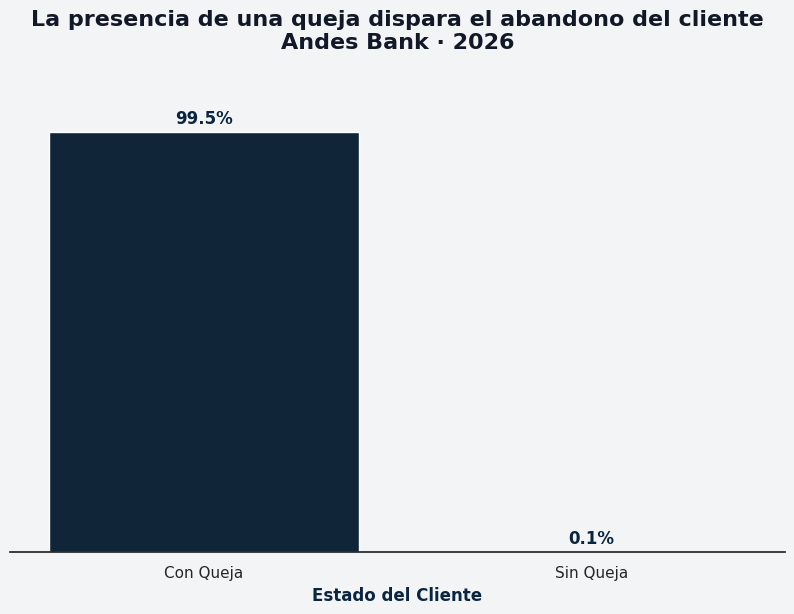

In [120]:
plot_churn_by_complain().show()

In [124]:
def churn_table_by_satisfaction():
    table = (
        df.groupby('satisfaction_score', observed=True)['exited']
          .agg(
              churn_rate=lambda x: round(x.mean() * 100, 1),
              total_clients='count'
          )
          .sort_values('churn_rate', ascending=False)
          .reset_index()

    )
    return table

churn_table_by_satisfaction()

,satisfaction_score,churn_rate,total_clients
0,2,21.8,2014
1,4,20.6,2008
2,1,20.0,1932
3,5,19.8,2004
4,3,19.6,2042


In [132]:
df['exited_pct'] = df['exited'] * 100
df['complain_label'] = df['complain'].map({1: 'Con Queja', 0: 'Sin Queja'})

In [137]:
def churn_table_by_age_group():
  tabla_edad = pd.pivot_table(
      df,
      values='exited_pct',
      index='age_group',
      columns='complain_label',
      aggfunc='mean',
      observed=False,
      ).round(1)
  return tabla_edad

churn_table_by_age_group()

complain_label,Con Queja,Sin Queja
age_group,,
Young Adult,98.7,0.0
Established Adult,99.1,0.0
Senior,100.0,0.2
Older Adult,100.0,0.0


In [135]:
def churn_table_by_num_of_products():
  tabla_productos = pd.pivot_table(
      df,
      values='exited_pct',
      index='num_of_products',
      columns='complain_label',
      aggfunc='mean'
      ).round(1)
  return tabla_productos

churn_table_by_num_of_products()

complain_label,Con Queja,Sin Queja
num_of_products,,
1,99.8,0.1
2,98.0,0.0
3,100.0,0.0
4,100.0,NaN


In [134]:
def churn_table_by_geography():
  tabla_geografia = pd.pivot_table(
      df,
      values='exited_pct',
      index='geography',
      columns='complain_label',
      aggfunc='mean'
  ).round(1)
  return tabla_geografia

churn_table_by_geography()

complain_label,Con Queja,Sin Queja
geography,,
France,99.6,0.0
Germany,99.3,0.1
Spain,99.8,0.0


## **4. Exportación de gráficos**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora, vamos a nuestra última etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gráficos que generamos dentro de una función y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight', dpi=300, transparent=True)
nombre_imagen.close()

```
Las funciones son:
*   plot_churn_rate()
*   plot_churn_by_age_group()
*   plot_churn_by_financial_features()
*   plot_churn_by_engagement()
*   plot_churn_by_satisfaction()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la función que genera el gráfico.

Utiliza el lenguaje Python para crear el código y no mostrar las imágenes.

In [138]:
funciones = [
    plot_churn_rate,
    plot_churn_by_age_group,
    plot_churn_by_number_of_products,
    plot_churn_by_complain
]

for func in funciones:
    func()
    nombre_func = func.__name__

    plt.savefig(
        f'{nombre_func}.png',
        bbox_inches='tight',
        dpi=300,
        transparent=True
    )

    plt.close()

## **5. Conclusiones:**

El análisis de datos revela que Andes Bank enfrenta una tasa de abandono estructural del **20.4%**. Aunque ciertos segmentos demográficos presentan mayor vulnerabilidad —como el grupo **Senior (51.1%)**, los clientes en **Alemania (32.4%)** y las **mujeres (25.1%)**—, estos factores resultan secundarios frente al determinante crítico: la **experiencia del cliente**.

El predictor absoluto de fuga es la presencia de **quejas**: el **99.5%** de los clientes que registran una queja abandonan la entidad. Este riesgo se amplifica en clientes con alta complejidad de relación (**85.9% de churn** en clientes con múltiples productos), indicando que la exposición a fallos operativos y fricciones en la experiencia es el motor principal del abandono.

Otros factores como el salario, score crediticio, programas de lealtad o tipo de tarjeta muestran **neutralidad estadística**, lo que confirma que la fuga no es un problema de oferta económica sino de **resolución efectiva y recuperación de confianza**.

En síntesis, Andes Bank enfrenta una crisis de retención basada en la experiencia, donde la gestión de quejas y la simplificación de la relación financiera son la palanca más efectiva para reducir el churn.

## **6. Recomenaciones:**

* **Protocolo de Recuperación Crítica (PQRS):** Implementación inmediata de una política donde toda queja registrada dispare una intervención proactiva en menos de **12 horas**. Es vital pasar de una resolución reactiva a una acción correctiva personalizada que detenga la fuga antes de que el cliente inicie el proceso de cierre.
* **Auditoría Operativa en el Mercado Alemán:** Dado que Alemania concentra un riesgo equivalente a la suma de España y Francia, se requiere una revisión urgente de la operativa local, barreras idiomáticas y adecuación tecnológica para eliminar las fricciones que generan el volumen atípico de quejas.
* **Servicio Preferencial "Gold Service" (Segmento Senior):** Crear un canal de atención simplificado para clientes mayores de 45 años. Priorizar la asistencia humana y la resolución rápida de problemas, mitigando la sensibilidad de este grupo ante fallos en procesos digitales.
* **Optimización de la Estrategia Multiproducto:** Ante el **85.9% de abandono** en clientes con múltiples productos, se debe priorizar la **calidad de la vinculación** sobre la cantidad. Se recomienda un soporte dedicado para clientes "Highly Engaged" que garantice una post-venta impecable por cada servicio contratado.
* **Sistema de Alerta Temprana de Churn:** Desarrollar un motor de analítica predictiva que priorice casos de riesgo basados en la detección de quejas y patrones de interacción críticos, permitiendo al equipo de retención intervenir en los perfiles de mayor valor antes del punto de no retorno.